# Vahadane Demo

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
import utils
from vahadane import vahadane
from sklearn.manifold import TSNE

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
SOURCE_PATH = './data/i9*16.png'
TARGET_PATH = './data/target1.png'
RESULT_PATH = './output/i9*16_to_t1_f.png'

## Load source and target images

source image size:  (6144, 8192, 3)
target image size:  (300, 300, 3)


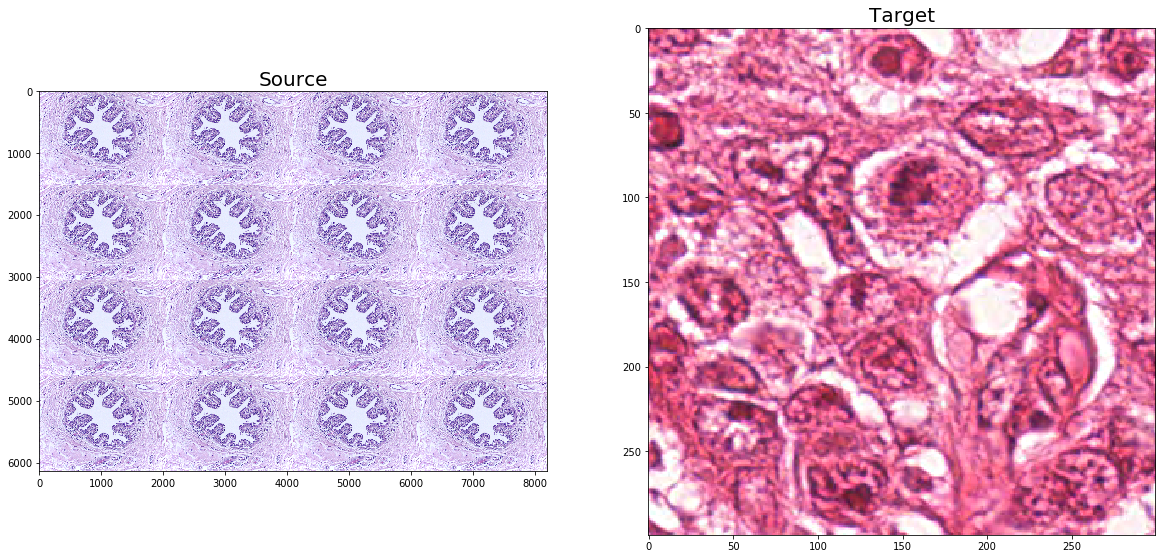

In [106]:
source_image = utils.read_image(SOURCE_PATH)
target_image = utils.read_image(TARGET_PATH)
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 20.0))
plt.subplot(1, 2, 1)
plt.title('Source', fontsize=20)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target', fontsize=20)
plt.imshow(target_image)
plt.show()

## Configuration

In [107]:
vhd = vahadane(LAMBDA1=0.01, LAMBDA2=0.01, fast_mode=1, getH_mode=1)
vhd.show_config()

STAIN_NUM = 2
THRESH = 0.9
LAMBDA1 = 0.01
LAMBDA2 = 0.01
ITER = 100
fast_mode = 1
getH_mode = 1


## Stain Separation and Color Normalization

In [108]:
Ws, Hs = vhd.stain_separate(source_image)
vhd.fast_mode=0;vhd.getH_mode=0;
Wt, Ht = vhd.stain_separate(target_image)

stain separation time: 11.858450889587402 s
stain separation time: 0.06272101402282715 s


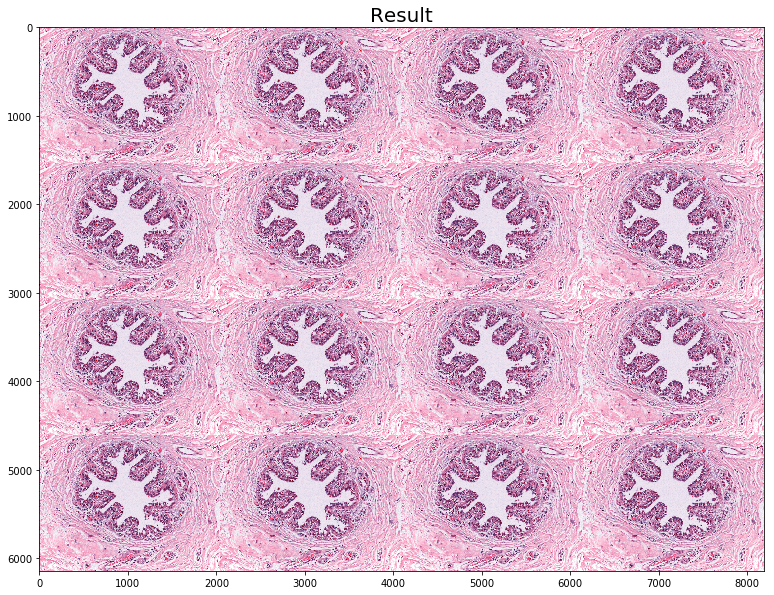

True

In [109]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result', fontsize=20)
plt.imshow(img)
plt.show()
cv2.imwrite(RESULT_PATH, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=19980723)
data = np.concatenate((img[:, :, 0], img[:, :, 1], img[:, :, 2]), axis=0)
print(data.shape)
result = tsne.fit_transform(data.T)
print(result)

(18432, 8192)


In [ ]:
data = np.concatenate((source_image[:,:,0],source_image[:,:,1],source_image[:,:,2]), axis=0)
print(data.shape)
result0 = tsne.fit_transform(data.T)
print(result0)

In [ ]:
t_min = result.min(axis=0)
t_max = result.max(axis=0)
result = (result - t_min) / (t_max - t_min)
t_min = result0.min(axis=0)
t_max = result0.max(axis=0)
result0 = (result0 - t_min) / (t_max - t_min)
print(result)
print(result0)
plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.plot(result[:, 0], result[:, 1], 'r.')
plt.subplot(2,2,2)
plt.plot(result0[:,0], result0[:,1], 'r.')
plt.show()